In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
%matplotlib notebook

In [2]:
# Create a reference the CSV file desired
csv_path = "houston_data.csv"

# Read the CSV into a Pandas DataFrame
houston_df = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
houston_df.head()

,Location Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Inside/Outside City Limits,Liquor Receipts,Wine Receipts,Beer Receipts,Cover Charge Receipts,Total Receipts
0,1,BEER MARKET CO,920 STUDEMONT ST STE 900,HOUSTON,TX,77007,101,Y,26664,4825,69957,0,101446
1,2,PRESIDIO,911 W 11TH ST,HOUSTON,TX,77008,101,Y,37824,37136,13945,0,88905
2,1,DADDY O'S SPORT BAR,5830 SPENCER HWY,PASADENA,TX,77505,101,Y,8542,150,9845,0,18537
3,1,CRAZY FROGS BAR AND GRILL,13703 WEST RD,HOUSTON,TX,77041,101,N,33016,825,26071,0,59912
4,1,DON PATRON BAR & GRILL,500 DALLAS ST STE P50,HOUSTON,TX,77002,101,Y,5065,372,4465,0,9902


In [3]:
# Breakdown by city

clean_df = houston_df.loc[houston_df['Location City'] != 'HOUSTON N']
clean_df['Location City'].value_counts()


HOUSTON          310252
KATY              18123
SUGAR LAND        12885
PEARLAND           9065
PASADENA           8574
CYPRESS            8420
LEAGUE CITY        5213
SOUTH HOUSTON      1514
Name: Location City, dtype: int64

In [4]:
#Export clean_df to csv
clean_df.to_csv('clean_houston_data.csv',index=False)

In [16]:
#Determine the mean of the individual receipt types

liquor_df = clean_df.groupby('Location City', as_index=False)['Liquor Receipts'].mean()
liquor_df.sort_values(by=['Liquor Receipts'])


,Location City,Liquor Receipts
6,SOUTH HOUSTON,5469.924703
4,PASADENA,12418.684161
5,PEARLAND,14065.846773
0,CYPRESS,14840.845131
3,LEAGUE CITY,15534.427777
2,KATY,16145.227611
7,SUGAR LAND,18173.236787
1,HOUSTON,20774.753761


<IPython.core.display.Javascript object>


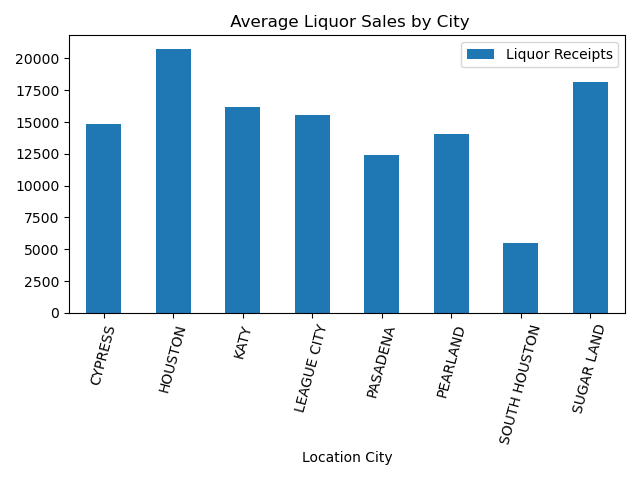

In [19]:
#Plot Liquor Receipts by City

liquor_df.plot.bar(x="Location City", y="Liquor Receipts", rot=75, title=" Average Liquor Sales by City")
plt.tight_layout()

In [17]:
#Determine the mean of the individual receipt types

wine_df = clean_df.groupby('Location City', as_index=False)['Wine Receipts'].mean()
wine_df.sort_values(by=['Wine Receipts'])

,Location City,Wine Receipts
6,SOUTH HOUSTON,74.257596
4,PASADENA,737.874738
3,LEAGUE CITY,1964.480721
5,PEARLAND,2740.405074
0,CYPRESS,2981.802732
2,KATY,3799.405065
7,SUGAR LAND,6454.852076
1,HOUSTON,8819.389364


<IPython.core.display.Javascript object>


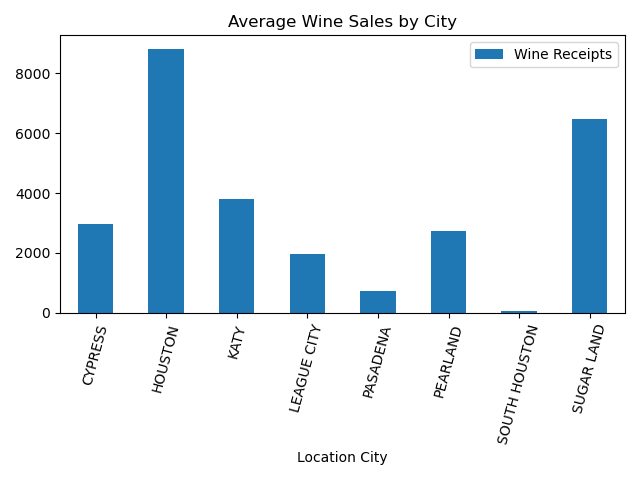

In [20]:
#Plot Wine Receipts by City

wine_df.plot.bar(x="Location City", y="Wine Receipts", rot=75, title="Average Wine Sales by City")
plt.tight_layout()

In [18]:
#Determine the mean of the individual receipt types

beer_df = clean_df.groupby('Location City', as_index=False)['Beer Receipts'].mean()
beer_df.sort_values(by=['Beer Receipts'])

,Location City,Beer Receipts
5,PEARLAND,7642.496635
3,LEAGUE CITY,9532.023787
6,SOUTH HOUSTON,9940.319683
0,CYPRESS,10407.036342
4,PASADENA,10859.263588
7,SUGAR LAND,10905.608304
2,KATY,11023.393092
1,HOUSTON,11856.181282


<IPython.core.display.Javascript object>


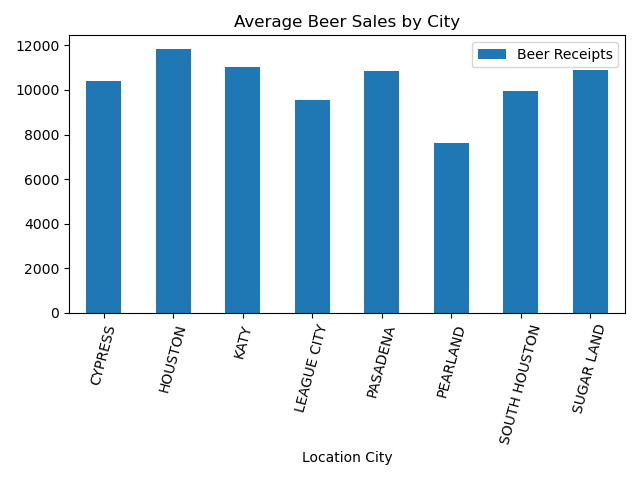

In [21]:
#Plot Beer Receipts by City

beer_df.plot.bar(x="Location City", y="Beer Receipts", rot=75, title="Average Beer Sales by City")
plt.tight_layout()

In [12]:
#Create a new summary dataframe
babysteps_df = pd.merge(liquor_df, wine_df, on="Location City")
babysteps_df

,Location City,Liquor Receipts,Wine Receipts
0,CYPRESS,14840.845131,2981.802732
1,HOUSTON,20774.753761,8819.389364
2,KATY,16145.227611,3799.405065
3,LEAGUE CITY,15534.427777,1964.480721
4,PASADENA,12418.684161,737.874738
5,PEARLAND,14065.846773,2740.405074
6,SOUTH HOUSTON,5469.924703,74.257596
7,SUGAR LAND,18173.236787,6454.852076


In [13]:
avg_df = pd.merge(babysteps_df, beer_df, on="Location City")
avg_df

,Location City,Liquor Receipts,Wine Receipts,Beer Receipts
0,CYPRESS,14840.845131,2981.802732,10407.036342
1,HOUSTON,20774.753761,8819.389364,11856.181282
2,KATY,16145.227611,3799.405065,11023.393092
3,LEAGUE CITY,15534.427777,1964.480721,9532.023787
4,PASADENA,12418.684161,737.874738,10859.263588
5,PEARLAND,14065.846773,2740.405074,7642.496635
6,SOUTH HOUSTON,5469.924703,74.257596,9940.319683
7,SUGAR LAND,18173.236787,6454.852076,10905.608304


In [15]:
#Total Number of entities

total_count = len(clean_df["Location City"])
total_count

total_count_df = pd.DataFrame({"Total TABC Entities": [total_count]})
total_count_df

,Total TABC Entities
0,374046


<IPython.core.display.Javascript object>


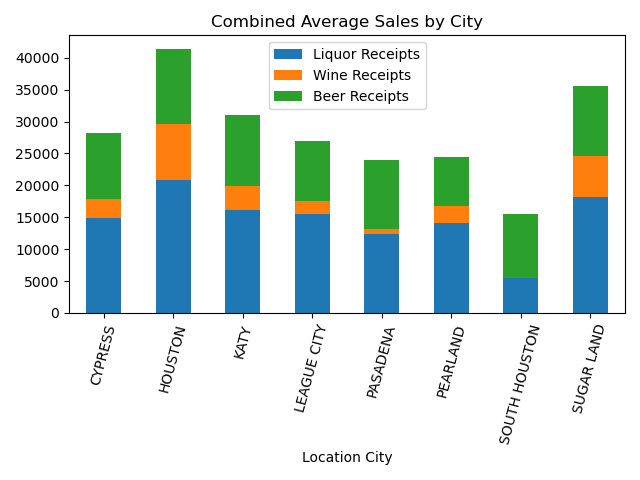

In [22]:

avg_df.plot.bar(x="Location City",stacked=True,rot=75, title="Combined Average Sales by City")
plt.tight_layout()